## Real-estate modelling in Julia
Author: Phua Wen Pu wenpu_phua@mymail.sutd.edu.sg

### Introduction:
My thesis research area is in blockchain and architecture, specifically how blockchain can be used to improve current methods of real estate development with a positive architectural outcome. Instead of focusing on the blockchain itself (e.g. the simulation of an Ethereum node, or particular data structures within the blockchain distributed ledger), this specific project using ideas learnt from HPC to make one of the building blocks of an overall user-driven real-estate investment strategy.  The topic hence chosen was the modelling of a real estate "market" given existing data, parameters which will be user-input, and outcomes are probabilistic based on the input of one or many users.

### Agent-based modelling 
As it was the my first case-study Julia program, the initial research was focused on what makes a reasonable model of real estate activities, this led to the well published method of the economist Thomas Schelling from 1971: <a href="https://en.wikipedia.org/wiki/Schelling%27s_model_of_segregation"> see Schelling's model of segregation </a>, which was influenced by Conway's Game of Life in 1970. Since then, there has been a new disciple of agent based modelling (ABM) for real estate and other spatial disciplines in the social sciences. I did not find an over-arching comprehensive model for real estate <b>market</b> ABM, but there have been recent summaries which aligned with this particular topic of simulating the market and potentially linking it to blockchain technologies, namely, <a href="https://www.bvc.dk/media/1194/an-agent-based-model-of-the-housing-market-thesis.pdf">Master's thesis by Christian Langholz Carstensen</a> and <a href="https://studenttheses.uu.nl/bitstream/handle/20.500.12932/39624/Agent-based%20modeling%20as%20a%20tool%20to%20support%20decision%20making%20rules%20used%20by%20smart%20contracts%20in%20DLT%20based%20communities.pdf?sequence=1">Master's thesis by Tom Peirs</a>

<img src="ODD_protocol.png" width="450" align="center">

The above image was taken from the book by Steven F. Railsback and Volker Grimm's book and course <a href="https://www.railsback-grimm-abm-book.com/book-objectives-2nd-edition/"> Agent-based and Individual-based modeling </a>, it is an outline of a typical method of developing ABM, they call the ODD protocol (it stands for Overview, Design concepts and Details). Due to the time constraint, only a part of the ODD protocol was looked into:

1. The purpose and patterns I was looking for was a change in price should be endogenous to the model, once initial input parameters were allocated.  The difficulty highlighted in the thesis by Carstensen above, was that other published ABM real estate models simply assumed that there was a match in the initial state of housing buyers and sellers.

2. The assumption was that all housing market activity was going to be initiated by income in some way. This model concentrates only on rental situations, that is, household rental (landlords' offers) and tenancies (agent bids). The state variables are the global variables which were predefined, such as interest rate, inflation rate, agent population size (i.e. number of households). During the whole course of development, I considered scale of population to be the main factor to increase in order for the simulation to take advantage of HPC concepts. This meant that initially, during the testing phases small percentages such as 0.006% of the total number of households was modelled, and this can be increased if there was no compute or memory-bound to 50%. The difficulty with the current model scaling beyond 50% is a question of current algorithm definition (which can be reworked): if 50% of households are renters, then 50% of households are the landlords. Currently, the market is a one-good economy, i.e. it only considers renters and rentals. In the Julia code, the renters are prefixed as agents_ their corresponding abilities to spend are prefixed as budget_ and the rentals/tenancies are prefixed as house_. The next idea of scale is to consider the multifarious goods and services available, the current model definition allows for such scaling, i.e. it is not idiosyncratic to housing market along, but since housing accounts for somewhere between 26-30% of disposable income, it would be the first to consider. If statistical data of other expenditures, e.g. transport expenditure of private hire cars were available, it is straightforward to extend the same model, albeit with a smaller time scale to model the transport expenditure market.

3. The simulation starts by collecting input data (in our case, household income ranked by poorest to richest decile, this is readily available from Singapore Statistics department <a href=https://www.singstat.gov.sg/find-data/search-by-theme/households/household-income/latest-data> SingStat website</a>. Retrieving data in <b>deciles</b> was motivated by an earlier attempt to look at world income from this dataset: <a href=https://github.com/jackblun/Globalinc/blob/master/GCIPrawdata.csv> from the Global Consumption and Income Project </a>, where the hope was once the model was successful, it could be re-run on the nearly 5000 other datapoints of historically proven data, and see if there were opportunities to learn from the 30-year evolution of such figures in each of the countries charted. After the monthly household income has been loaded into the respective deciles, a population sample size is chosen, and a random sampling process distributes individual agent budgets to make up the nominal size of the whole agent population being simulated, The market model, which is the recurring simulation cycle that will be describe in more detail below, takes place and at the end of each cycle, an updated graph of rental bid and ask prices is displayed. Note that at the data initialisation stage, the household rental offer prices, which are also sampled in deciles, are based on a presumed uppermost and lowermost house sale price.  Note the house-sale price is between $\$$ 50,000 and about $\$$ 4+ million at the midpoint of the lowermost and uppermost decile.


4. The basic interaction in the "market" initiates from <b>one</b> number, the budget i.e. bid price which each agent can afford. This budget, then becomes the mean, i.e. the peak of a normal probability distribution function (PDF). Using this PDF, all available input asking-prices will result in an output between 0-1 which gives the probability that such good at such ask-price will be procured by the agent. For each agent, every available good on the market is hence 'surveyed' with this PDF, the results are stored in a cache, and sorted so the highest probabilities appear at the top. This cache of probabilities, and corresponding index of willing agents is thus named a 'scoreboard'. Agents are ranked in ascending income (poorest first, richest last), while there is no necessity for income (hence budget) to be ranked, this "market" model considers that government intervention will likely privilege the lowest income group when it comes to queuing for housing bids.  

The following table is a typical list of PDF outputs for the agent which is ranked 10/72. Note that the probabilities peak at the 14th row item, which corresponds to the rental ask price that agent 10 prefers the most <p>
<img src="agent_10_choices.png" width=160px>

The following table is the sort result of the choices of available housing 1-72, index 14 appears at the top, and the index 1 (being cheapest) appears much later. <p><img src="agent_10_choices.png" width=160px>

5. Much unlike Schelling's agent based modelling which is based on cellular automaton, there are no explicit spatial constraints of the locality of the market. While Schelling's cellular automaton is an elegant abstraction, my opinion was that in 1970s the idea of an Internet connected market was less obvious and localised search assumptions can hold better, in the 2020s it should be trivial for real-world market participants to have access to hundreds of data points of rental ask-bid pricing. Bearing in mind the relative computational cost of the sort function mentioned above, the scoreboard is now extended by one more column using the 3rd, 4th, 5th... etc. up to n choices determined by some "market visibility" factor. The market visibility factor while simplistically assumed to be some given constant ahead of time, would in fact influence bidder behaviour in subsequent runs.  For example it may privilege capitalist hoarding of several low-priced units so as to gain control of the market, or it may influence low-bidders to exit the market early, etc.  Such behaviours were not modelled here, but hopefully in subsequent studies they can be emergent properties of a more comprehensive agent logic.  

The following table is the first run resultof the "market scoreboard" after the bids have been allocated, each row index corresponds to the particular housing which is on the market, with row 1 being the cheapest and subsequent row numbers increasing in price, the housing which remains unallocated does not appear on the scoreboard in the first two columns, i.e. the entry is 0. There is a possibility of duplicate entries on column 2, reason being the PDF from the particular agent (e.g. agent 2) allows it to choose both housing number 6 and 7, however each run of the loop will only allocate one housing per agent.  The last column, which relates to "market visibility" records the potential <b>bid</b> prices submitted by the agents which is winning in a second round of non-allocative auction <p><img src="market_scoreboard.png" width=260px>

From here on, we look at the source code itself.

In [1]:
#using CUDA
using Plots, BenchmarkTools
include("./Load_Income.jl")
include("./Initialise_Data.jl")
include("./Model_Functions.jl")

Main.Model_Functions

In order not to crowd the main source file with too much boilerplate data initialisation code, the modules Load_Income.jl and Initialise_Data.jl contain the code to load the desired .CSV file, extrapolate the mean income in each decile into the preferred sample size.

The Model_Functions.jl 

In [2]:

#inflation and mortgage interest in %
inflation_rate = 5.5
interest_rate = 4.7
# row number of the income dataframe to load
const row_number = 1
# ratio of the entire state's population to model
const pop_ratio = 0.00006 #model sizes below 64 are not working well
#corrector for rents
const rent_coeff = 1.7
#base unit price of house
const base_unit_price = 50000
#coefficient for house prices
const price_coeff =0.0002
#spread ratio in rental probability
const rent_spread = 0.2 # this is variance of the probability func.
#CUDA vector size control, memory bound:
const cuda_max_vector = 2^20
const tenure_typical = 6 #6 months being the typical tenure
#market visibility: what portion of the market can house sellers
#"see" in prices, numbers above 20% will likely bias scoreboard to richer buyers 
market_visibility = 0.19


0.19

In [3]:

# income data from singstat public database year 2022 -> row 1, year 2000 -> 23
income_df = Load_Income.load_income("./income.csv")
num_households = income_df[row_number,:"Number_Households"]
println("Total Number of Households in this dataframe row: ", num_households)
println("We simulate approximately ",pop_ratio*100, "% of them")
num_households =Int32(round((pop_ratio*num_households)/8)*8)
println("Number of households simulated: ",num_households)
if num_households >= cuda_max_vector 
    println("Number of households simulated larger than CUDA memory limit")
    return
end


Total Number of Households in this dataframe row: 1224200
We simulate approximately 0.006% of them
Number of households simulated: 72


In [4]:
# agent_list has 5 columns-> 1:income, 2:savings, 3>:expenditure, 
# 4:housing_expenditure, 5:accumulated_savings
agent_list = zeros(Int32,num_households,5);
Initialise_Data.populate_agents(income_df, row_number, agent_list)
#sort the agent_list from lowest to highest income
sort!(agent_list, dims = 1)
Initialise_Data.savings_agents(agent_list; savings_lo = 25, savings_hi = 42)
Initialise_Data.expenditure_agents(agent_list; housing_lo = 26, housing_hi = 30)

#house_list has 3 columns-> 1:house price, 2:rental price, 3:rented_by
house_list = zeros(Int32,num_households,3)
Initialise_Data.house_list_price_from_income(income_df, row_number, agent_list, 
house_list,base_unit_price, price_coeff) 
#sort the houses_list from lowest to highest price
sort!(house_list, dims = 1)
h_size = size(house_list)[1]
a_size = size(agent_list)[1]
max_house_price = house_list[h_size]
println("Max house price: ", max_house_price)
#rentals initiated here
Initialise_Data.house_list_rental(house_list, interest_rate, inflation_rate, 
rent_coeff, max_house_price)

println("\nInitialised values: ")
println("\nagent_list has 5 columns ->
 1:monthly income, 2:monthly savings, 3:expenditure, 4:housing_expenditure, 5:accumulated_savings \n")
display(agent_list)
println("\nhouse_list has 3 columns-> 
 1:house price, 2:rental price, 3:rented_by \n")
display(house_list)
agent_budgets = agent_list[:,4] #this gives us the agents' rental agent_budgets
agent_budgets = hcat(agent_budgets,zeros(Int32,length(agent_budgets))) #append a column of zeros as rental tenure
house_rentals = house_list[:,2] #this gives us the house rental prices
house_rentals = hcat(house_rentals,zeros(Int32,length(house_rentals))) #append a column of zeros as agent tenant identities

The year is 2022 in Singapore
Max house price: 5775761

Initialised values: 

agent_list has 5 columns ->
 1:monthly income, 2:monthly savings, 3:expenditure, 4:housing_expenditure, 5:accumulated_savings 



72×5 Matrix{Int32}:
  1265    468    797   207  0
  1601    656    945   284  0
  2061    742   1319   369  0
  2362    614   1748   454  0
  2373    641   1732   450  0
  2499    700   1799   486  0
  2514    930   1584   459  0
  3214   1286   1928   521  0
  3312    861   2451   662  0
  3549   1384   2165   650  0
  3674   1286   2388   621  0
  4133   1075   3058   826  0
  4206   1472   2734   711  0
     ⋮                      
 18947   6253  12694  3300  0
 19568   7044  12524  3757  0
 19719   7099  12620  3534  0
 20488   7581  12907  3356  0
 23141   7405  15736  4091  0
 23664   8046  15618  4061  0
 23809   9047  14762  4429  0
 23919   9328  14591  4377  0
 25247  10604  14643  4393  0
 25434   9919  15515  4499  0
 25575   6905  18670  5601  0
 26304   9469  16835  4882  0


house_list has 3 columns-> 
 1:house price, 2:rental price, 3:rented_by 



72×3 Matrix{Int32}:
   13358     54  0
   21397     88  0
   35459    146  0
   46572    192  0
   47007    194  0
   52131    215  0
   52759    217  0
   86230    356  0
   91569    378  0
  105142    435  0
  112679    465  0
  142592    589  0
  147674    610  0
       ⋮         
 2996722  12383  0
 3196381  13208  0
 3245902  13412  0
 3504005  14479  0
 4470230  18471  0
 4674573  19315  0
 4732035  19553  0
 4775861  19734  0
 5320901  21986  0
 5400015  22313  0
 5460053  22561  0
 5775761  23865  0

72×2 Matrix{Int32}:
    54  0
    88  0
   146  0
   192  0
   194  0
   215  0
   217  0
   356  0
   378  0
   435  0
   465  0
   589  0
   610  0
     ⋮  
 12383  0
 13208  0
 13412  0
 14479  0
 18471  0
 19315  0
 19553  0
 19734  0
 21986  0
 22313  0
 22561  0
 23865  0

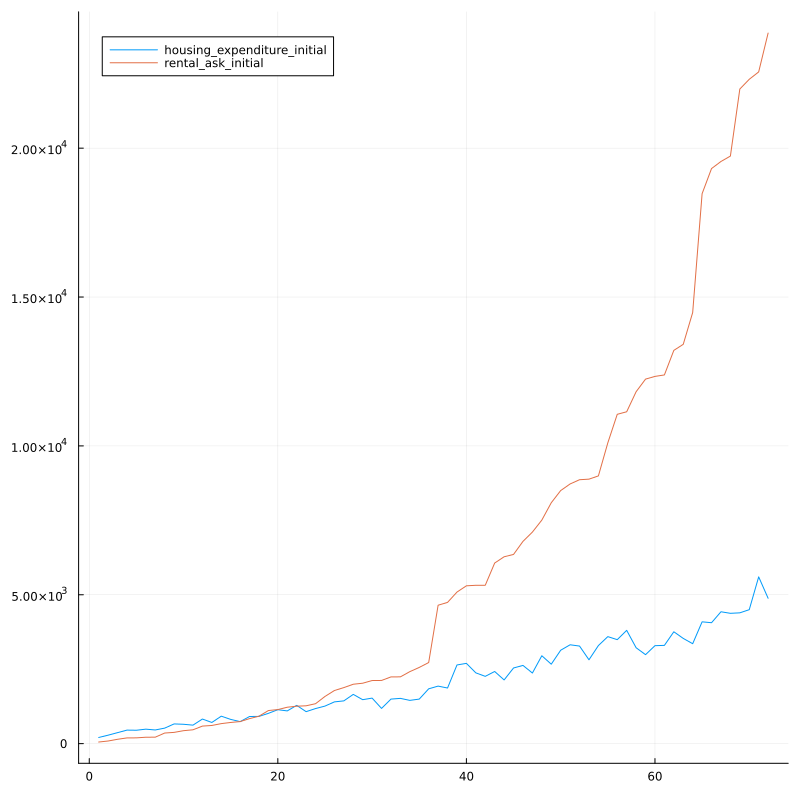

In [5]:
N = size(house_rentals)[1] #agent_budgets assumed to be same size as house_rentals
visible_N = Int32(floor(N*market_visibility))
# first plot of rental prices against agent budgets
# run plot only for small number of households (e.g. < 1000)
if (N<4000)
    plot(collect(1:a_size), [agent_budgets[:,1] house_rentals[:,1]], layout=(1,1), 
    label=["housing_expenditure_initial" "rental_ask_initial"], reuse=false, size = (800,800)) 
end

#= setup for CUDA probability function
numblocks = ceil(Int, N/256)
#temporary vectors to store range of probabilities given budget and rentals
z_d = CUDA.zeros(Float16,N) 
y_d = CUDA.CuArray(house_rentals) 
=#
datadump = Any[] #for saving of each loop data
#sim loop number
SIM_LOOP = 1

anim = @animate for i in 1:10


In [8]:

########## "static" initialisation above ##########
# reason for renaming to z_h z_d is because of CUDA / non CUDA code
z_h = zeros(Float32,N)
y_h = house_rentals[:,1]
# scoreboard of bids, first column is bid price, second column is agent_number
market_scoreboard = zeros(Int32, (N,3))
#Model_Functions.saveCSV("budgets_initialisation.csv",agent_budgets)
#Model_Functions.saveCSV("house_rentals_initialisation.csv",house_rentals)

#only agent_budgets and house_rentals are dynamic variables from here onwards

# first critical decision loop, for each agent, discover their price preference,
# sort the preferences, top 2 preferred housings receives the highest bid
#multithreading isn't fair if richer bid ahead of poorer, but so is real life
Threads.@threads for i in eachindex(agent_budgets[:,1]) 
    budget = agent_budgets[i]
    # println("agent_budget_number: ", i); println("agent budget is: \$", budget)
    z_h = Model_Functions.rent_probability_CPU.(budget,y_h,rent_spread)
    #disable CUDA until there is a way to start CUDA functions in parallel processes
    #@sync @cuda threads=1024 blocks=numblocks Model_Functions.rent_probability_GPU(z_d, budget, y_d,rent_spread)
    #z_h = Array(z_d)
    choices = sortperm(z_h, rev=true); # println("sortperm for agent", i, " is ", choices')
    choices_truncated = collect(choices[1:2]) #only look at top 3 choices
    choices_others = collect(choices[3:visible_N]) #look at some of the rest of the choices
    #this first for loop gives us the bona fide buyers, whose top 2 choices fit their budget
    for choice in choices_truncated
        if house_rentals[choice] <= budget
            if market_scoreboard[choice] < budget
                market_scoreboard[choice] = budget
                market_scoreboard[N+choice]=i
            end 
        end
    end 
    #this second for loop gives us the other choices considered, so the scoreboard can 'learn' prices
    #the scoreboard third column of "learned" prices varies with market visibility etc.
    for choice in choices_others
        if budget >= market_scoreboard[choice]
            market_scoreboard[2N+choice] = budget
        end
    end
end #end of choice loop


In [9]:

#Model_Functions.saveCSV("market_scoreboard_FIRSTRUN.csv",market_scoreboard)

#old market mean for info
println("Previous mean rental: \$", Int32(round(sum(house_rentals[:,1])/N)))
#k1 is to capture all the housing which has willing bidders
k1 = map((x,y)-> (x!=0) ? y : 0, market_scoreboard[:,1], house_rentals[:,1])
size_k1 = sum( map((x)->(x!=0) ? 1 : 0, k1) )
#and using k1 to re-calculate the realistic market mean bid price
new_market_mean = Int32(round(sum(k1)/size_k1))
println("New mean of allocated market: \$", new_market_mean)


Previous mean rental: $6298
New mean of allocated market: $1699


In [10]:
#allocate the bidders their housing
last_bidder = 0
for i in eachindex(market_scoreboard[:,2])
    a_index = N+i
    bidder = market_scoreboard[a_index]
    if bidder!=0 && bidder==last_bidder
        continue
    else
        if bidder!=0
            house_rentals[a_index] = bidder #allocate the bidder to the rental
            house_rentals[i] = market_scoreboard[i]
            tenure = agent_budgets[a_index] #read the tenure from the agent_budget record, if it is 0, reset it
            (tenure==0) ? agent_budgets[a_index] = tenure_typical : agent_budgets[a_index] = tenure - 1
        end
    end
    last_bidder = bidder
end

#Model_Functions.saveCSV("house_rentals_FIRSTRUN.csv",house_rentals)
#Model_Functions.saveCSV("agent_budgets_FIRSTRUN.csv",agent_budgets)
#account for homeless (who or how many or both?)


In [11]:

for i in eachindex(agent_budgets[:,1])
    a_index = N+i
    budget = agent_budgets[i] 
    if agent_budgets[a_index] == 0
        if (budget > new_market_mean)
            println("agent_budget used to be: ", agent_budgets[i]," to be reduced")
            adjustment = rand(-15:0.5:0)/100 * budget #reduce somewhere up to 15% lower 
        else
            adjustment = rand(0:0.5:15)/100 * budget #else increase up to 15%
            println("agent_budget used to be: ", agent_budgets[i]," to be increased")
        end
        budget += adjustment; 
        agent_budgets[i] = Int32(round(budget))
    end
end
#vscodedisplay(agent_budgets) ##


agent_budget used to be: 1841to be reduced
agent_budget used to be: 1932to be reduced
agent_budget used to be: 2642to be reduced
agent_budget used to be: 2696to be reduced
agent_budget used to be: 2260to be reduced
agent_budget used to be: 2423to be reduced
agent_budget used to be: 2139to be reduced
agent_budget used to be: 2541to be reduced
agent_budget used to be: 2627to be reduced
agent_budget used to be: 2371to be reduced
agent_budget used to be: 2952to be reduced
agent_budget used to be: 2668to be reduced
agent_budget used to be: 3137to be reduced
agent_budget used to be: 3320to be reduced
agent_budget used to be: 3277to be reduced
agent_budget used to be: 2816to be reduced
agent_budget used to be: 3294to be reduced
agent_budget used to be: 3594to be reduced
agent_budget used to be: 3492to be reduced
agent_budget used to be: 3805to be reduced
agent_budget used to be: 3221to be reduced
agent_budget used to be: 2988to be reduced
agent_budget used to be: 3290to be reduced
agent_budge

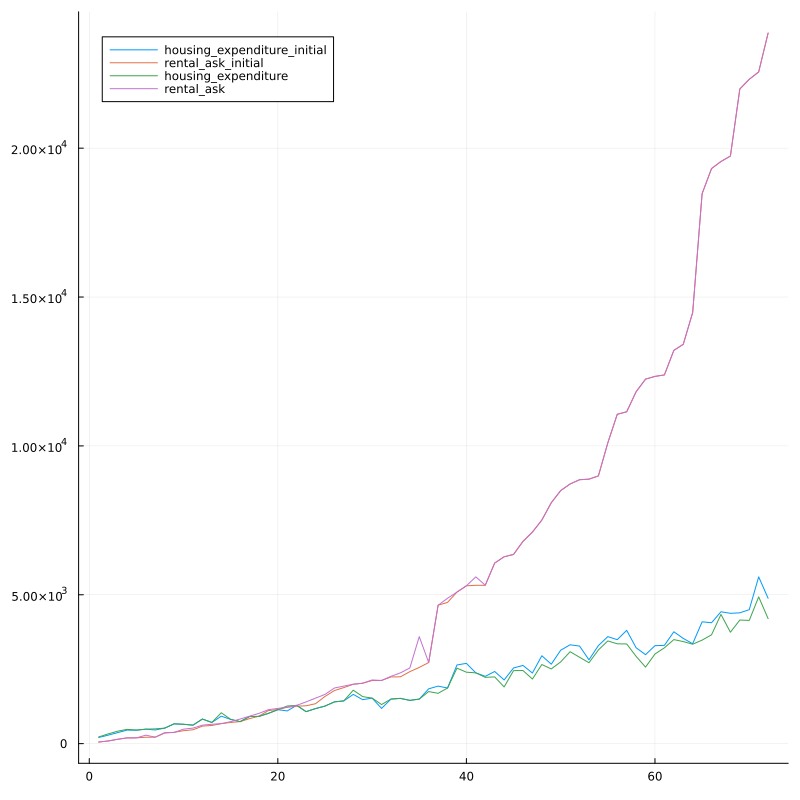

In [12]:
#adjust the rental prices across town

if (N<4000) # run plot only for small number of households (e.g. < 1000)
    plot!(collect(1:a_size), [agent_budgets[:,1] house_rentals[:,1]], layout=(1,1), 
    label=["housing_expenditure" "rental_ask"], reuse=true, size = (800,800)) 
end

datadump = hcat(house_rentals,agent_budgets)
#filename = "market_" * string(SIM_LOOP) * ".csv"
#Model_Functions.saveCSV(filename, datadump)

<img src="gameofrent.gif" width="800" align="center">

end

gif(anim, "gameofrent.gif"; fps = 5)
